# Project Name :: Retail Sales Prediction Project

## Problem Statement

- XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
- You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## Data Dictionary-1

- Id - an Id that represents a (Store, Date) duple within the set
- Store - a unique Id for each store
- Sales - the turnover for any given day (Dependent Variable)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- State Holiday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- School Holiday - indicates if the (Store) was affected by the closure of public schools

## Data Dictionary-2

- Store Type - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
- Competition Distance – the distance in meters to the nearest competitor store
- Competition Open Since[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0
= store is not participating, 1 = store is participating
- Promo2  Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- Promo Interval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store.

## Introduction

- The interest in a product continues to change occasionally. No business can work on its monetary growth without precisely assessing client interest and future demand for items.
- Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period.
- For a good sales forecast, it is also extremely important to get a good dataset. Forecasts heavily depend on the records, trends, and patterns observed for sales of a particular store. The variations could be due to several reasons.
- Talking from a business’s point of view, these sales forecasts are done consistently to improve.

## Data Structure

- Data 1- Columns- 9,  Rows- 1017210 (sample- 50k-1 lakh)

- Data 2 – Columns – 10, Rows – 1115

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Supress the warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from math import sqrt

### Loading Dataset

In [3]:
salesdata=pd.read_csv('Salesdata.csv')
salesdata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


In [4]:
sales_data=salesdata.copy()
sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


In [5]:
Stores=pd.read_csv('store.csv')
Stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
store=Stores.copy()
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Merging the two Datasets.

In [7]:
store_salesdata=pd.merge(sales_data,store,on='Store')
store_salesdata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,05-01-2013,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,04-01-2013,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,03-01-2013,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,02-01-2013,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [8]:
store_salesdata.shape

(1017209, 18)

- This dataset contains 1017209 rows and 18 columns.

In [9]:
store_salesdata.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [10]:
list(store_salesdata.select_dtypes(include='object'))

['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

### Dataset information

In [11]:
store_salesdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Stastical Description Of Dataset

In [12]:
store_salesdata.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [13]:
df=store_salesdata.copy()
df.shape

(1017209, 18)

### Missing Values

In [14]:
# Finding Missing Value in the Dataset
data_total = df.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df.isnull().sum()/df.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([data_total,percentage],keys=['Total','Percentage'],axis=1)
table

,Total,Percentage
PromoInterval,508031,49.943620
Promo2SinceYear,508031,49.943620
Promo2SinceWeek,508031,49.943620
CompetitionOpenSinceYear,323348,31.787764
CompetitionOpenSinceMonth,323348,31.787764
CompetitionDistance,2642,0.259730
DayOfWeek,0,0.000000
Promo2,0,0.000000
Assortment,0,0.000000
Store,0,0.000000


- We can see that some features have a high percentage of missing values and they won't give accurate sales values,
so we will remove features with more than 30% missing values.

In [15]:
df=df.drop(['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1)
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2'],
      dtype='object')

<Axes: xlabel='CompetitionDistance', ylabel='Count'>

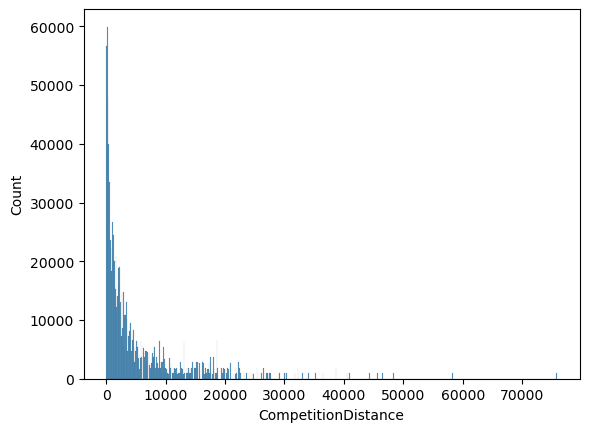

In [16]:
sns.histplot(x='CompetitionDistance',data=df)

- The distribution is right skewed and outliers are there in 'CompetitionDistance' column, so we will replace missing values with 'CompetitionDistance' median value.

In [17]:
df['CompetitionDistance']=df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [18]:
df.shape

(1017209, 13)

### Duplicate Values

In [19]:
# Checking for duplicate values
df[df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2


- This dataset doesnot have any duplicate values.

## Exploratory Data Analysis

In [20]:
#To check the correlation between the columns
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026451,0.008488
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000168
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.018870,-0.091040
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102363,-0.150159
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007987,-0.008309
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000140,-0.000983
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003666,-0.006909
CompetitionDistance,-0.026451,-0.000025,-0.018870,-0.102363,0.007987,0.000140,-0.003666,1.000000,-0.139228
Promo2,0.008488,0.000168,-0.091040,-0.150159,-0.008309,-0.000983,-0.006909,-0.139228,1.000000


### Heatmap Of Merged Dataset

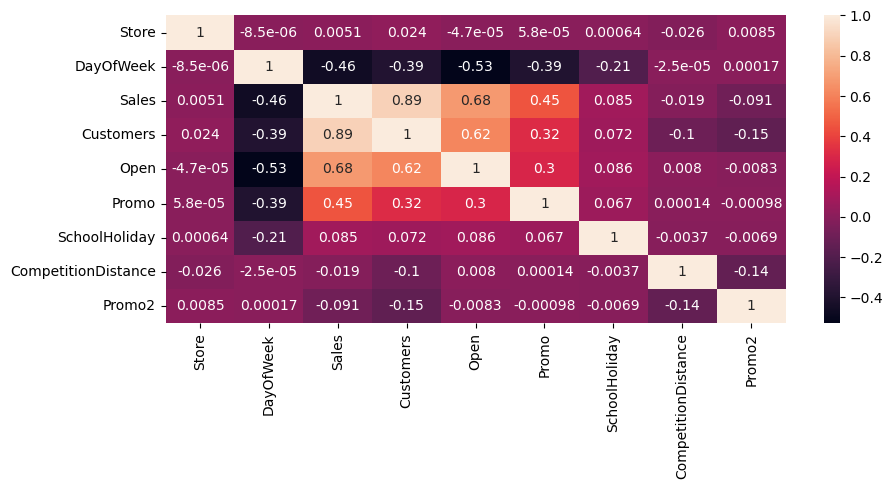

In [21]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

- As we can see there is high correlation between the sales and customers.

In [22]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2'],
      dtype='object')

In [23]:
# No.of stores in dataset
df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [24]:
df['Store'].nunique()

1115

- There are total 1115 stores in this dataset.

In [25]:
df['Date'].min()

'01-01-2013'

In [26]:
df['Date'].max()

'31-12-2014'

- This dataset contains 2 years of data.

In [27]:
df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

<Axes: xlabel='DayOfWeek', ylabel='count'>

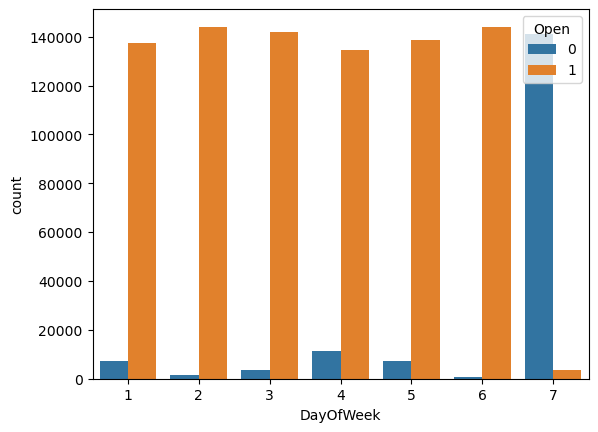

In [28]:
# countplot on 'DayOfWeek'
sns.countplot(x='DayOfWeek',data=df,hue='Open')

- From the graph we can conclude that stores are highly closed on 7th day compored to other days.

### Sales vs Day Of Week

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

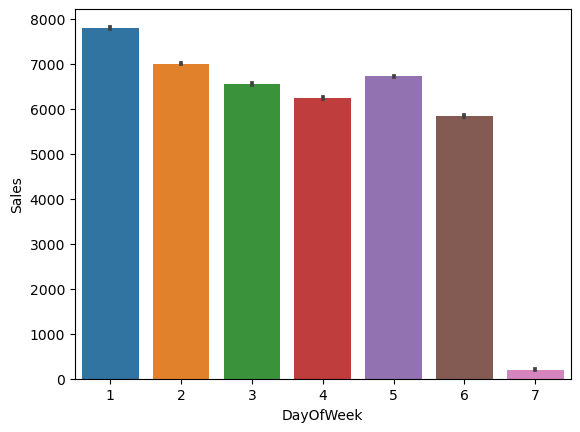

In [29]:
# Sales vs day of week
sns.barplot(x='DayOfWeek',y='Sales',data=df)

- First day  Sales are high compare to others.

In [30]:
df['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

### Promo vs Sales

<Axes: xlabel='Promo', ylabel='Sales'>

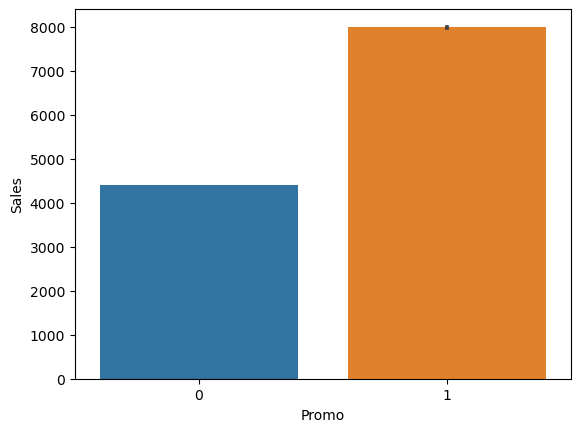

In [31]:
#impact of promo on sales
sns.barplot(x='Promo',y='Sales',data=df)

- When there is no promotion,the average sales value is around 4500.
- When there is a promotion,the avereage sales value is around 8000.
- As we can see sales have doubled when there is a promo ongoing.

In [32]:
df['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

### Promo2 vs Sales

<Axes: xlabel='Promo2', ylabel='Sales'>

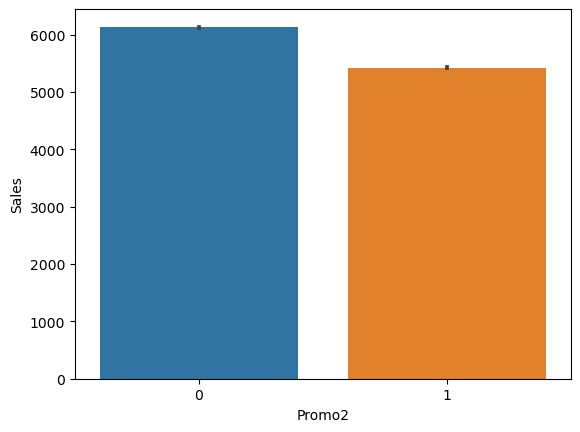

In [33]:
# promo2 vs sales
sns.barplot(x='Promo2',y='Sales',data=df)

- Sales are almost same when promo2 is ongoing.

### Sales affected by StateHoliday

In [34]:
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [35]:
df['StateHoliday']=df['StateHoliday'].map({0:0,'0':0,'a':1,'b':1,'c':1})

In [36]:
df['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

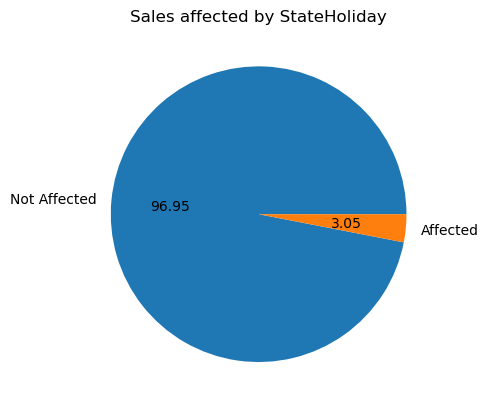

In [37]:
plt.pie(labels=['Not Affected','Affected'], x=df['StateHoliday'].value_counts().values,autopct='%0.2f')
plt.title('Sales affected by StateHoliday')
plt.show()

- Sales affected by state holiday is only 3.05% that means sales are not affected by state holiday that much.
- So we can drop this state holiday from data set.

In [38]:
df.drop('StateHoliday',axis=1,inplace=True)

### Sales affected by SchoolHoliday

In [39]:
df['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

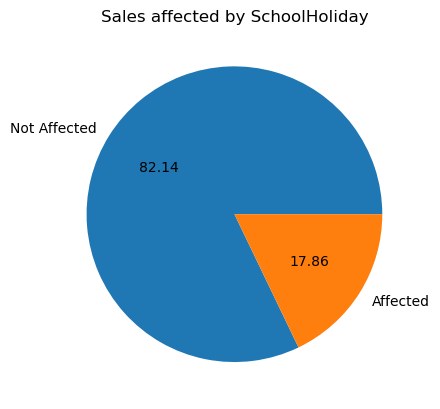

In [40]:
plt.pie(labels=['Not Affected','Affected'], x=df['SchoolHoliday'].value_counts().values,autopct='%0.2f')
plt.title('Sales affected by SchoolHoliday')
plt.show()

- Sales affected by school holiday is 17.86% and sales are not affected by school holiday is 82.14%.
- It appears that during school holidays,the average sales are higher compared to regular days.

### Store Types Distribution

In [41]:
df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

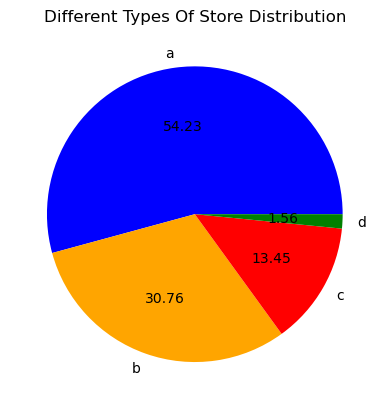

In [42]:
plt.pie(labels=['a','b','c','d'], x=df['StoreType'].value_counts().values,colors=['blue','orange','red','green'],autopct='%0.2f')
plt.title('Different Types Of Store Distribution')
plt.show()

- Store type 'a' has high distribution compare to others.

### Assortment vs Sales

In [43]:
df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

<Axes: xlabel='Assortment', ylabel='Sales'>

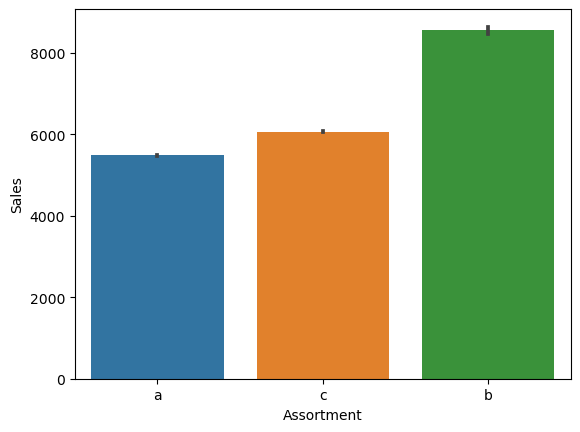

In [44]:
sns.barplot(x='Assortment',y='Sales',data=df)

### StoreType vs Assortment

<Axes: xlabel='StoreType', ylabel='count'>

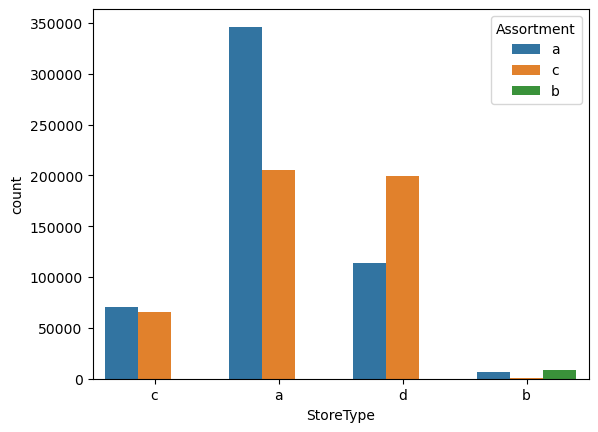

In [45]:
sns.countplot(x='StoreType',hue='Assortment',data=df)

### conversions on 'Date'

In [46]:
#converting date from object to datetime
df['Date']=pd.to_datetime(df['Date'])

In [47]:
#calculating month,day,year from date 
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['year']=df['Date'].dt.year

### Total Sales Per Month

In [48]:
monthly_sales=df.groupby('month')['Sales'].sum()
print('Total sales per month')
monthly_sales.sort_values()

Total sales per month


month
9     374112224
10    388630287
11    406149656
8     411747857
12    433792989
1     503402518
2     533417977
6     539382249
3     563596319
5     566298388
7     571128812
4     581521347
Name: Sales, dtype: int64

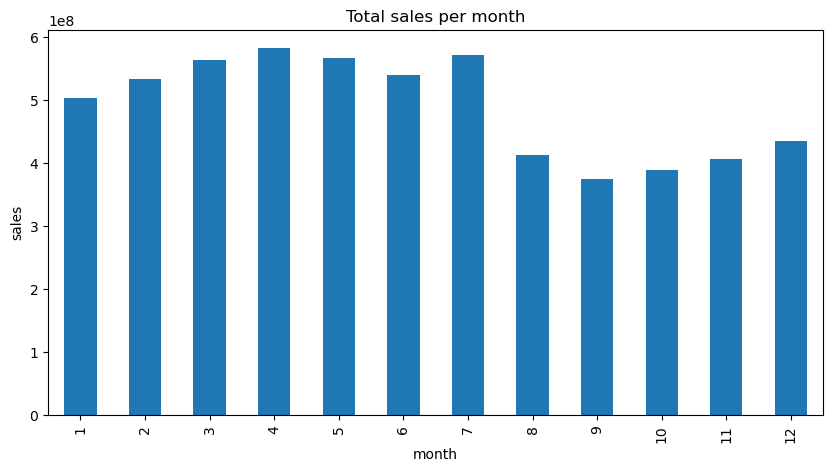

In [49]:
#Total sales by month
plt.figure(figsize=(10,5))
monthly_sales=df.groupby('month')['Sales'].sum().plot(kind='bar')
plt.title('Total sales per month')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

- Months between 3 to 7 has high sales.

### correlation between sales and customeres

In [50]:
#correlation between sales and customeres
sales_customer_corr=df['Sales'].corr(df['Customers'])
sales_customer_corr

0.8947107733017075

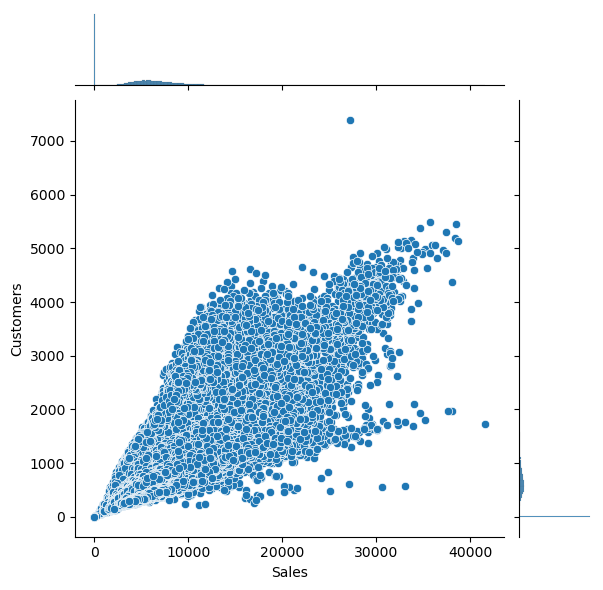

In [51]:
# correlation between sales and customers
sns.jointplot(x='Sales',y='Customers',data=df)

- There is positive correlation between sales and customers.

### Sales Distribution

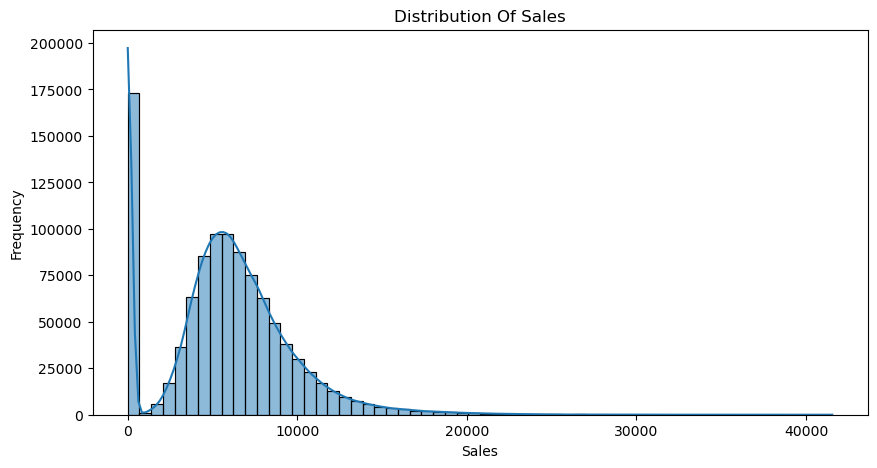

In [52]:
#Sales distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Sales'],bins=60,kde=True)
plt.title('Distribution Of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

- Sales distribution is rightly Skewed.

### Average Sales Per Month

In [53]:
df['AvgSalePerCustomer']=df['Sales']/df['Customers']

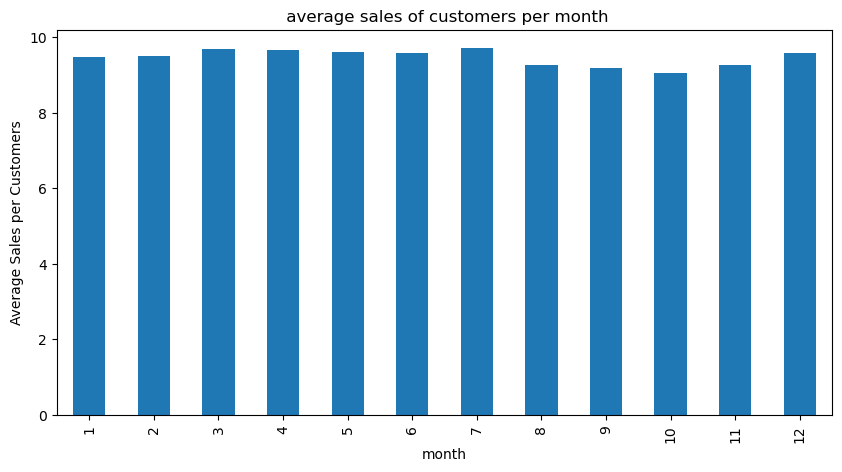

In [54]:
# Average sales per customer by month
plt.figure(figsize=(10,5))
avg_sales_per_customer=df.groupby('month')['AvgSalePerCustomer'].mean().plot(kind='bar')
plt.title(' average sales of customers per month')
plt.xlabel('month')
plt.ylabel('Average Sales per Customers')
plt.show()

- Average sales are high in december month.

### Sales vs Day

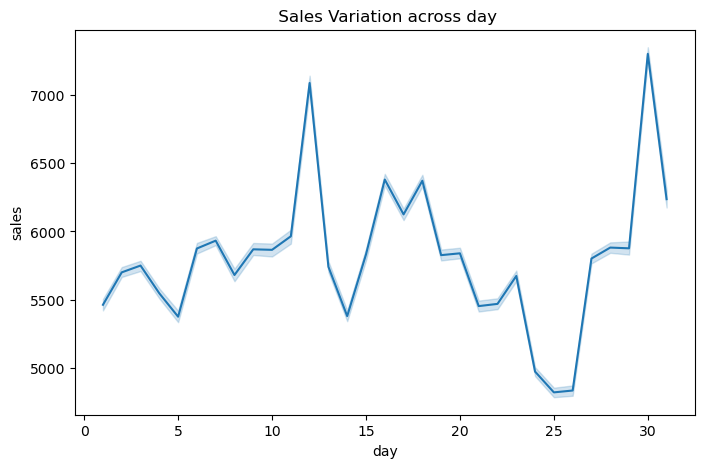

In [55]:
# sales vs day
plt.figure(figsize=(8,5))
sns.lineplot(x='day',y='Sales',data=df)
plt.title(' Sales Variation across day')
plt.xlabel('day')
plt.ylabel('sales')
plt.show()

- Sales are high on 30th day.

### sales vs year

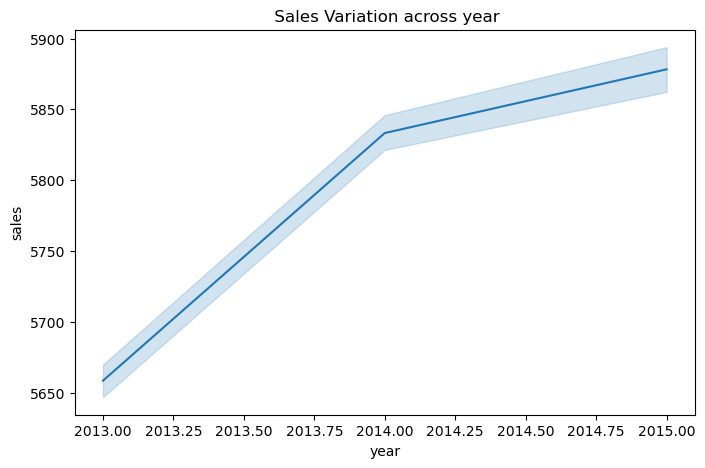

In [56]:
# sales vs year
plt.figure(figsize=(8,5))
sns.lineplot(x='year',y='Sales',data=df)
plt.title(' Sales Variation across year')
plt.xlabel('year')
plt.ylabel('sales')
plt.show()

- 2015 has high sales variation.

### Barplot Of Sales By School Holidays And Promo

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

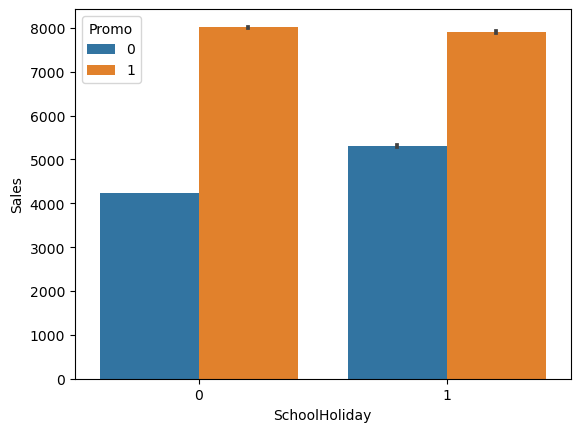

In [57]:
# barplot of sales by school holidays and promo
sns.barplot(x='SchoolHoliday',y='Sales',hue='Promo',data=df)

- sales appear to be higher during school holidays compared to periods with no school holidays. This suggests that there might be a correlation between school holidays and increased sales.
- Within each school holiday category, sales seem to be generally higher during promotionscompared to periods with no promotions. 
- The combination of school holidays and promotions (dark blue bars) appears to have the highest sales compared to all other categories. This suggests that these factors have a potentially additive effect, where promotions provide an extra boost to sales during periods of already increased customer activity due to school holidays.

In [58]:
df.drop(['month','day','year','AvgSalePerCustomer'],axis=1,inplace=True)
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2'],
      dtype='object')

## Data Preprocessing

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   SchoolHoliday        1017209 non-null  int64         
 8   StoreType            1017209 non-null  object        
 9   Assortment           1017209 non-null  object        
 10  CompetitionDistance  1017209 non-null  float64       
 11  Promo2               1017209 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
me

In [60]:
df.CompetitionDistance=df.CompetitionDistance.astype('int64')
df.CompetitionDistance.dtype

dtype('int64')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   SchoolHoliday        1017209 non-null  int64         
 8   StoreType            1017209 non-null  object        
 9   Assortment           1017209 non-null  object        
 10  CompetitionDistance  1017209 non-null  int64         
 11  Promo2               1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 

## missing values/null values

In [62]:
# There are no missiing values
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

### Removing Outliers

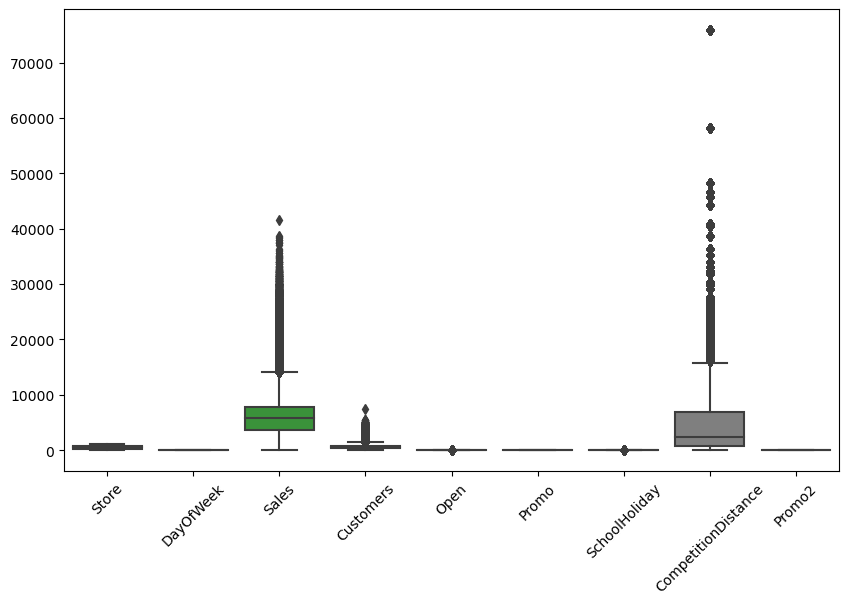

In [63]:
numeric_columns = df[[
    "Store", "DayOfWeek", "Sales", "Customers", "Open", "Promo", "SchoolHoliday",
    "CompetitionDistance","Promo2"]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns, orient='v')
plt.xticks(rotation=45)
plt.show()

In [64]:
df.skew()

Store                 -0.000955
DayOfWeek              0.001593
Sales                  0.641460
Customers              1.598650
Open                  -1.758045
Promo                  0.487838
SchoolHoliday          1.677842
CompetitionDistance    2.933466
Promo2                -0.002255
dtype: float64

- The variables which are greater than 0 are rightly skewed. so mean > median > mode.
- The variables which are less than 0 are left skewed. so mode > median > mean.

In [65]:
# IQR method, to check for outliers.

q1=df['CompetitionDistance'].quantile(0.25)
q3=df['CompetitionDistance'].quantile(0.75)

iqr=q3-q1
posout=q3+1.5*iqr
negout=q1-1.5*iqr
outliers=df[(df['CompetitionDistance'] >posout) | (df['CompetitionDistance'] <negout)]
outliers

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
3768,5,5,2015-07-31,4822,559,1,1,1,a,a,29910,0
3769,5,4,2015-07-30,4943,539,1,1,1,a,a,29910,0
3770,5,3,2015-07-29,5899,658,1,1,1,a,a,29910,0
3771,5,2,2015-07-28,6083,598,1,1,1,a,a,29910,0
3772,5,1,2015-07-27,7059,650,1,1,1,a,a,29910,0
...,...,...,...,...,...,...,...,...,...,...,...,...
984580,1079,6,2013-05-01,6525,533,1,0,1,a,a,16680,1
984581,1079,5,2013-04-01,8555,721,1,0,1,a,a,16680,1
984582,1079,4,2013-03-01,7975,676,1,0,1,a,a,16680,1
984583,1079,3,2013-02-01,7566,669,1,0,1,a,a,16680,1


- Since data is rightly skewed we use IQR method to find out outliers.
- Outliers are there in this data set.

In [66]:
df_no_outliers = df[(df['CompetitionDistance'] >= negout) & (df['CompetitionDistance'] <= posout)]
df_no_outliers.shape

(918049, 12)

In [67]:
df.shape

(1017209, 12)

In [68]:
q1=df_no_outliers['Sales'].quantile(0.25)
q3=df_no_outliers['Sales'].quantile(0.75)

iqr=q3-q1
posout=q3+1.5*iqr
negout=q1-1.5*iqr
outliers=df_no_outliers[(df_no_outliers['Sales'] >posout) | (df_no_outliers['Sales'] <negout)]
outliers

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
2280,3,1,2014-06-30,15689,1193,1,1,0,a,a,14130,1
2469,3,1,2013-12-23,14461,1579,1,0,1,a,a,14130,1
2475,3,2,2013-12-17,14555,1284,1,1,0,a,a,14130,1
2476,3,1,2013-12-16,14647,1282,1,1,0,a,a,14130,1
2918,4,4,2015-04-30,16106,1854,1,1,0,c,c,620,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,2013-07-01,21237,2962,1,1,0,a,c,870,0
1016262,1114,6,2013-05-01,18856,3065,1,0,0,a,c,870,0
1016263,1114,5,2013-04-01,18371,3036,1,0,1,a,c,870,0
1016264,1114,4,2013-03-01,18463,3211,1,0,1,a,c,870,0


In [69]:
df1_no_outliers = df_no_outliers[(df_no_outliers['Sales'] >= negout) & (df_no_outliers['Sales'] <= posout)]
df1_no_outliers.shape

(892938, 12)

In [70]:
q1=df1_no_outliers['Customers'].quantile(0.25)
q3=df1_no_outliers['Customers'].quantile(0.75)

iqr=q3-q1
posout=q3+1.5*iqr
negout=q1-1.5*iqr
outliers=df1_no_outliers[(df1_no_outliers['Customers'] >posout) | (df1_no_outliers['Customers'] <negout)]
outliers

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
2826,4,5,2015-07-31,13995,1498,1,1,1,c,c,620,0
2843,4,2,2015-07-14,12315,1485,1,1,0,c,c,620,0
2844,4,1,2015-07-13,13550,1619,1,1,0,c,c,620,0
2857,4,2,2015-06-30,13106,1488,1,1,0,c,c,620,0
2872,4,1,2015-06-15,12398,1473,1,1,0,c,c,620,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1015874,1114,2,2014-01-28,13911,2373,1,0,0,a,c,870,0
1015886,1114,4,2014-01-16,13268,2200,1,0,0,a,c,870,0
1016197,1114,1,2013-11-03,13761,2178,1,0,1,a,c,870,0
1016250,1114,4,2013-01-17,13618,2324,1,0,0,a,c,870,0


In [71]:
df2_no_outliers = df1_no_outliers[(df1_no_outliers['Customers'] >= negout) & (df1_no_outliers['Customers'] <= posout)]
df2_no_outliers.shape

(872189, 12)

In [72]:
df.shape

(1017209, 12)

### Encoding using LabelEncoder

In [73]:
# Without outliers

In [74]:
from sklearn.preprocessing import LabelEncoder
cols=list(df2_no_outliers.select_dtypes(include='object'))
# Encode labels of object dtype multiple columns at once 
df2_no_outliers[cols] = df2_no_outliers[cols].apply(LabelEncoder().fit_transform)
df2_no_outliers.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270,0
1,1,4,2015-07-30,5020,546,1,1,1,2,0,1270,0
2,1,3,2015-07-29,4782,523,1,1,1,2,0,1270,0
3,1,2,2015-07-28,5011,560,1,1,1,2,0,1270,0
4,1,1,2015-07-27,6102,612,1,1,1,2,0,1270,0


In [75]:
df2_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872189 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                872189 non-null  int64         
 1   DayOfWeek            872189 non-null  int64         
 2   Date                 872189 non-null  datetime64[ns]
 3   Sales                872189 non-null  int64         
 4   Customers            872189 non-null  int64         
 5   Open                 872189 non-null  int64         
 6   Promo                872189 non-null  int64         
 7   SchoolHoliday        872189 non-null  int64         
 8   StoreType            872189 non-null  int32         
 9   Assortment           872189 non-null  int32         
 10  CompetitionDistance  872189 non-null  int64         
 11  Promo2               872189 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(9)
memory usage: 79.9 MB


## Models

### Feature selection

In [76]:
# Feature selection
x=df2_no_outliers.drop(['Sales','Date'],axis=1)
y=df2_no_outliers['Sales']

In [77]:
y.value_counts()

0        156751
5674        188
6214        177
6049        177
5558        176
          ...  
640           1
798           1
870           1
1009          1
13620         1
Name: Sales, Length: 13079, dtype: int64

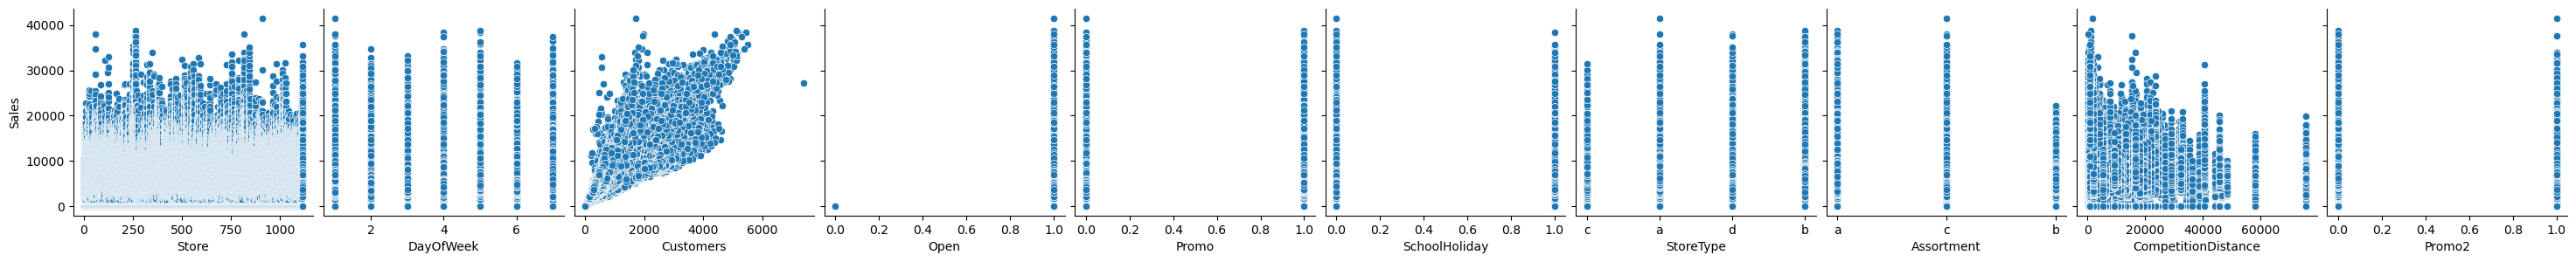

In [78]:
#to check linearity we use this
sns.pairplot(df,x_vars=x.columns,y_vars='Sales',kind='scatter',size=3)

- Since target variable is continous , we use linear regression algoritham for this data set.

### Data splitting

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(697751, 10)
(174438, 10)
(697751,)
(174438,)


### scalling

In [80]:
# Transforming data
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

### model1: Linear Regression

In [81]:
#model buliting
from sklearn.linear_model import LinearRegression
lm2=LinearRegression()
lm2.fit(x_train,y_train)

LinearRegression()

In [82]:
print(lm2.intercept_)
print(lm2.coef_)

4867.949535403765
[ -52.94575574  -47.62281075 3047.9543651   879.86222914 1009.59826997
    8.39116766  670.39105216  248.98525549  322.36281588  235.17371832]


In [83]:
#prediction
y_train_pred=lm2.predict(x_train)
y_test_pred=lm2.predict(x_test)

In [84]:
#calculating metric for training and testing
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.889933240700724
0.8891166068902412


In [85]:
#adj.r2 calculation
n=x_train.shape[0]
k=x_train.shape[1]
r2=r2_score(y_test,y_test_pred)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.8891150177109894

In [86]:
#mse and Rmse
print('the mse is',mean_squared_error(y_test,y_test_pred))
print('the Rmse is',np.sqrt(mean_squared_error(y_test,y_test_pred)))

the mse is 1183249.3568213533
the Rmse is 1087.7726586108668


Text(0.5, 1.0, 'Actual vs Predicted values')

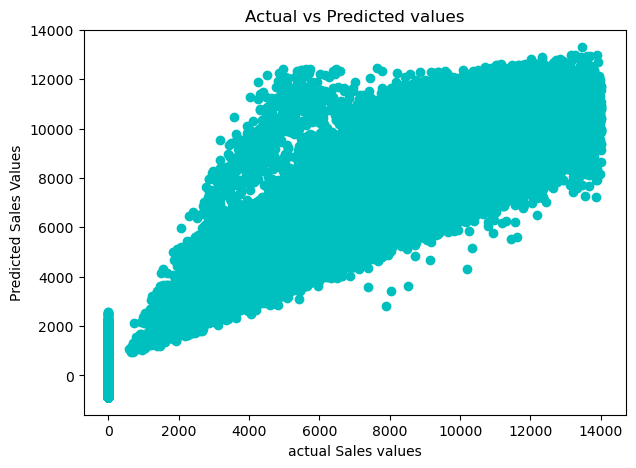

In [87]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(7,5))
plt.scatter(x=y_test,y=y_test_pred,c='c')
plt.xlabel('actual Sales values')
plt.ylabel('Predicted Sales Values')
plt.title('Actual vs Predicted values')

In [88]:
#storing 100 observations for analysis
simple_lr_pred = y_test_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

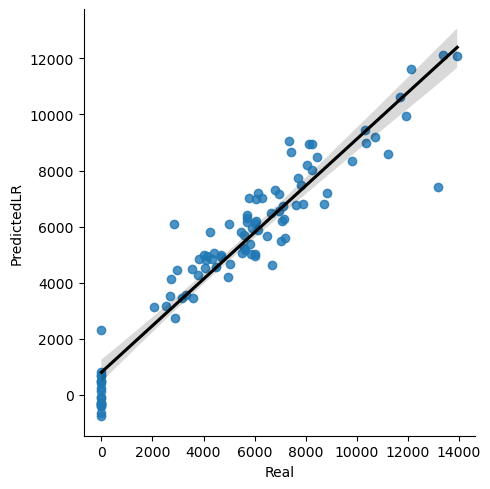

In [89]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'})

### model 2: Decision Tree Model

In [90]:
#Fit Model
from sklearn.tree import DecisionTreeRegressor
dec_regressor = DecisionTreeRegressor(max_depth=50,max_features=20, max_leaf_nodes=200,random_state=0)
dec_regressor=dec_regressor.fit(x_train, y_train)

In [91]:
#Predict train & test values
y_pred_train = dec_regressor.predict(x_train)
y_pred_test = dec_regressor.predict(x_test)

In [92]:
print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))

0.9222373497823897
0.9213925774546228


In [93]:
#adj.r2 calculation
n=x_train.shape[0]
k=x_train.shape[1]
r2=r2_score(y_test,y_pred_test)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.9213914508541334

In [94]:
#mse and Rmse
print('the mse is',mean_squared_error(y_test,y_pred_test))
print('the Rmse is',np.sqrt(mean_squared_error(y_test,y_pred_test)))

the mse is 838828.7872479978
the Rmse is 915.8759671745939


In [95]:
#mse and Rmse
print('the mse is',mean_squared_error(y_train,y_pred_train))
print('the Rmse is',np.sqrt(mean_squared_error(y_train,y_pred_train)))

the mse is 830581.9832330089
the Rmse is 911.362706738107


In [96]:
#storing 100 observations for analysis
simple_lr_pred = y_pred_test[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

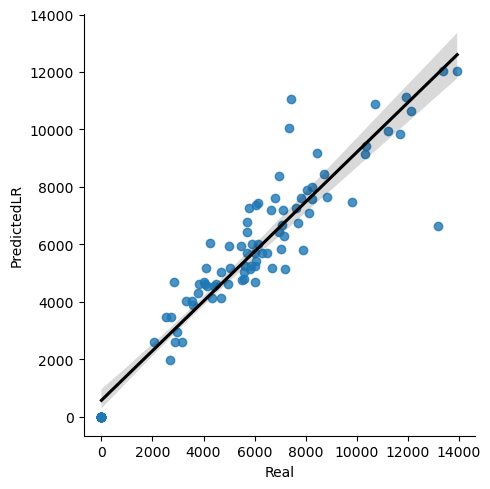

In [97]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'})

### model 3 : Random Forest Regression

In [98]:
# Creating the Random Forest model with default hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
# Fitting the model to the training data
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [99]:
# Predict train & test values
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [100]:
print(r2_score(y_train,y_pred_train_rf))
print(r2_score(y_test,y_pred_test_rf ))

0.9969933478429741
0.9830237878599899


In [101]:
#adj.r2 calculation
n=x_train.shape[0]
k=x_train.shape[1]
r2=r2_score(y_test,y_pred_test_rf )
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.983023544557153

In [102]:
#mse and Rmse
print('the mse is',mean_squared_error(y_test,y_pred_test_rf))
print('the Rmse is',np.sqrt(mean_squared_error(y_test,y_pred_test_rf)))

the mse is 181155.09935781304
the Rmse is 425.6231894032714


In [103]:
#mse and Rmse
print('the mse is',mean_squared_error(y_train,y_pred_train_rf))
print('the Rmse is',np.sqrt(mean_squared_error(y_train,y_pred_train_rf)))

the mse is 32114.017519798937
the Rmse is 179.20384348500716


In [104]:
#storing 100 observations for analysis
simple_lr_pred = y_pred_test_rf[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

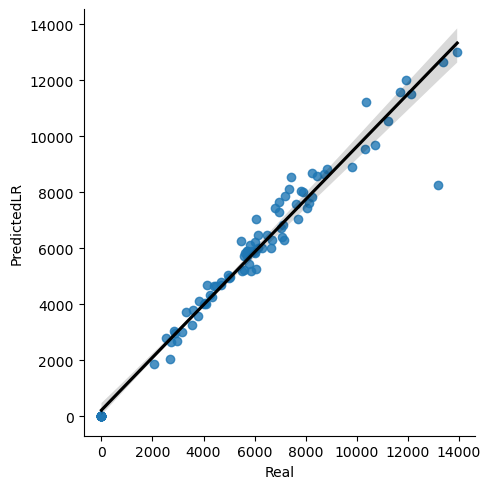

In [105]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'})

### model 4: Lasso Regression

In [106]:
from sklearn.linear_model import Ridge, Lasso
from math import sqrt

from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha': [2,5,10, 15, 20,30,40,100]}
lasso_regressor=GridSearchCV(lasso, parameters,cv=5)
lasso_regressor.fit(x_train, y_train)
print("Best parameter:", lasso_regressor.best_params_)
print("Best score:",lasso_regressor.best_score_)

Best parameter: {'alpha': 2}
Best score: 0.8899197062038828


In [107]:
y_pred_train_lasso=lasso_regressor.predict(x_train)
y_pred_test_lasso=lasso_regressor.predict(x_test)
print(r2_score(y_train,y_pred_train_lasso ))
print(r2_score(y_test,y_pred_test_lasso ))
print('the mse is',mean_squared_error(y_test,y_pred_test_lasso))
print("RMSE on test:",sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

0.8899236988205423
0.8891045031844167
the mse is 1183378.5168491127
RMSE on test: 1087.8320260265887


### model 5: Ridge Regression

from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha': [2,5,10, 15, 20,30,40,100], 'max_iter': [50,100,150,200]}
ridge_regressor=GridSearchCV(ridge, parameters,cv=5)
ridge_regressor.fit(x_train, y_train)
print("Best parameter:", ridge_regressor.best_params_)
print("Best score:",ridge_regressor.best_score_)

In [109]:
y_pred_train_ridge=ridge_regressor.predict(x_train)
y_pred_test_ridge=ridge_regressor.predict(x_test)
print(r2_score(y_train,y_pred_train_ridge ))
print(r2_score(y_test,y_pred_test_ridge ))
print('the mse is',mean_squared_error(y_test,y_pred_test_ridge))
print("RMSE on test:",sqrt(mean_squared_error(y_test, y_pred_test_ridge)))

0.8899332406831524
0.8891166105544559
the mse is 1183249.3177201005
RMSE on test: 1087.7726406377853


Based on the evaluation metrics on the test set, the Random Forest Regression algorithm performs the best with the lowest MSE, RMSE, and MAE values, and the highest R2 score. Therefore, the Random Forest Regression model is the preferred choice among the listed algorithms for this particular problem.

# Summary

The project involves predicting the daily sales of over 3,000 XYZ drug stores across 7 European countries. With historical sales data provided, the goal is to forecast sales for up to six weeks in advance. Various factors such as promotions, competition, school and state holidays, seasonality, and locality influence store sales.

### Exploratory Data Analysis (EDA) revealed several insights:
    
- There is a high correlation value between the sales and customers. we can see positive correlation between them.
- we can conclude that stores are highly closed on 7th day compored to other days.
- The sales distribution is positively skewed, with the maximum sales being 41551 and the minimum being 0.
- First-day sales tend to be higher compared to other days.
- Sales are almost same when promo2 is ongoing.
- Promotions have a significant positive effect on sales, with average sales around 4500 without promotions and around 8000 with promotions.
- State holidays coded as '0' have the highest average sales compared to other categories, suggesting differences in consumer behavior during regular days versus state holidays.
- Sales are higher during school holidays compared to regular days, indicating potential differences in consumer behavior during school breaks.
- Certain months, weeks, and days exhibit higher sales, suggesting seasonality and temporal patterns in sales data.
- Months between 3 to 7 has high sales.
- Average sales are high in december month.
- Sales are high on 30th day.
- 2015 has high sales variation.
- Since RMSE value is lowest for random forest, The Random Forest Regression algorithm outperforms other algorithms based on evaluation metrics on the test set.

# Conclusion

The project provides valuable insights into factors influencing retail sales and demonstrates the effectiveness of machine learning algorithms in predicting sales. By leveraging historical sales data and machine learning models, XYZ can make more accurate sales forecasts, optimize inventory management, and improve decision-making processes. Additionally, the findings can help XYZ company marketing strategies, promotions, and operational plans to maximize sales and enhance overall business performance.